In [128]:
import pandas as pd

df = pd.read_excel('data.xlsx')

print(df)

   NAME OF THE PRODUCT  BRAND NAME  MODEL NAME   TOTAL VOLUME   HEIGHT  \
0        New Product 1     Brand X     Model X          500.0    150.0   
1        New Product 2     Brand Y     Model Y          450.0    170.0   
2        New Product 3     Brand Z     Model Z          550.0    160.0   
3        New Product 4     Brand W     Model W          600.0    180.0   
4        New Product 5     Brand A     Model A          400.0    140.0   
5        New Product 6     Brand B     Model B          550.0    160.0   
6        New Product 7     Brand C     Model C          500.0    150.0   
7        New Product 8     Brand D     Model D          600.0    180.0   
8        New Product 9     Brand E     Model E          450.0    170.0   
9       New Product 10     Brand F     Model F          550.0    160.0   
10      New Product 11     Brand G     Model G          400.0    140.0   
11      New Product 12     Brand H     Model H          600.0    180.0   
12      New Product 13     Brand I    

In [129]:
import pandas as pd

df = pd.read_excel('data.xlsx')

df = df.rename(columns={"NAME OF THE PRODUCT": "urun_adı",
                        " BRAND NAME": "marka_adı", 
                        " MODEL NAME": "model_adı",
                        " TOTAL VOLUME": "toplam_hacim",
                        " HEIGHT": "yukseklik",
                        " WIDTH": "genislik" ,
                        " FREEZER FEATURE": "dondurucu_ozelligi",
                        " MEDICINE": "tip",
                        " ENERGY_CLASS": "enerji_sınıfı", 
                        " WARRANTY_PERIOD": "garanti_suresi" , 
                        " COLOUR": "renk" , 
                        " DEPTH": "derinlik", 
                        " FREEZER LOCATION": "dondurucu_yeri", 
                        " PRICE": "fiyat", 
                        " POINTS": "yıldız", 
                        " COMMENTS": "yorumlar",
                        " EVALUATION": "degerlendirme",
                        "COMMENT_NUM": "yorum_sayısı"})

print(df.head(10))

         urun_adı marka_adı model_adı  toplam_hacim  yukseklik  genislik  \
0   New Product 1   Brand X   Model X         500.0      150.0      60.0   
1   New Product 2   Brand Y   Model Y         450.0      170.0      70.0   
2   New Product 3   Brand Z   Model Z         550.0      160.0      65.0   
3   New Product 4   Brand W   Model W         600.0      180.0      75.0   
4   New Product 5   Brand A   Model A         400.0      140.0      50.0   
5   New Product 6   Brand B   Model B         550.0      160.0      60.0   
6   New Product 7   Brand C   Model C         500.0      150.0      55.0   
7   New Product 8   Brand D   Model D         600.0      180.0      70.0   
8   New Product 9   Brand E   Model E         450.0      170.0      65.0   
9  New Product 10   Brand F   Model F         550.0      160.0      70.0   

  dondurucu_ozelligi            tip enerji_sınıfı  garanti_suresi  \
0           No Frost    Single Door           A++             2.0   
1         Frost Free    D

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   urun_adı           32 non-null     object 
 1    BRAND NAME        32 non-null     object 
 2    MODEL NAME        32 non-null     object 
 3    TOTAL VOLUME      32 non-null     float64
 4    HEIGHT            32 non-null     float64
 5    WIDTH             32 non-null     float64
 6    FREEZER FEATURE   32 non-null     object 
 7    MEDICINE          32 non-null     object 
 8    ENERGY_CLASS      32 non-null     object 
 9    WARRANTY_PERIOD   32 non-null     float64
 10   COLOUR            32 non-null     object 
 11   DEPTH             32 non-null     float64
 12   FREEZER LOCATION  32 non-null     object 
 13   PRICE             32 non-null     float64
 14   POINTS            32 non-null     float64
 15   COMMENTS          32 non-null     object 
 16   EVALUATION        32 non-nu

In [130]:
C = df['yıldız'].mean()
print(C)

4.709375


In [131]:
m = df['degerlendirme'].quantile(0.90)
print(m)

312.3


In [132]:
q_buzdolabı = df.copy().loc[df["degerlendirme"] >= m]
q_buzdolabı.shape

(4, 18)

In [133]:
df.shape

(32, 18)

In [134]:
def weighted_rating(x, m=m, C=C):
    v = x['degerlendirme']
    R = x['yıldız']
    # Calculation based on the tv formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [135]:
q_buzdolabı['score'] = q_buzdolabı.apply(weighted_rating, axis=1)

In [136]:
q_buzdolabı = q_buzdolabı.sort_values('score', ascending=False)

q_buzdolabı[['urun_adı', 'degerlendirme', 'yıldız', 'score']].head(20)

,urun_adı,degerlendirme,yıldız,score
29,New Product 30,358.0,5.0,4.864595
11,New Product 12,329.0,4.9,4.807170
25,New Product 26,328.0,4.9,4.807025
3,New Product 4,314.0,4.9,4.804946


In [137]:
df['yorumlar'].head()

0     "This refrigerator exceeded my expectations. ...
1     "Great value for money. The design is sleek a...
2     "I'm impressed by the efficiency of this refr...
3     "The best refrigerator I have ever owned. The...
4     "Simple and effective. Exactly what I needed ...
Name: yorumlar, dtype: object

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

df['yorumlar'] = df['yorumlar'].fillna('')

tfidf_matrix = tfidf.fit_transform(df['yorumlar'])

tfidf_matrix.shape

(32, 66)

In [143]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [144]:
cosine_sim.shape

(32, 32)

In [145]:
cosine_sim[1]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.30258119, 0.        , 0.        , 0.24766542, 0.40983538,
       0.4345659 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11819539, 0.        , 0.        , 0.19050427,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.55722217, 0.32427104, 0.        , 0.        ,
       0.20540331, 0.        ])

In [146]:
indices = pd.Series(df.index, index=df['urun_adı']).drop_duplicates()

In [147]:
indices[:10]

urun_adı
New Product 1     0
New Product 2     1
New Product 3     2
New Product 4     3
New Product 5     4
New Product 6     5
New Product 7     6
New Product 8     7
New Product 9     8
New Product 10    9
dtype: int64

In [148]:
def get_recommendations(urun_adı, cosine_sim=cosine_sim):
    idx = indices[urun_adı]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    b_indices = [i[0] for i in sim_scores]

    return df['urun_adı'].iloc[b_indices]

In [149]:
df["urun_adı"][5]

'New Product 6'

In [150]:
#puana göre tavsiye
get_recommendations('New Product 6')

19    New Product 20
1      New Product 2
27    New Product 28
10    New Product 11
16    New Product 17
7      New Product 8
9     New Product 10
0      New Product 1
2      New Product 3
3      New Product 4
Name: urun_adı, dtype: object

In [151]:
get_recommendations('New Product 7')

23    New Product 24
20    New Product 21
25    New Product 26
30    New Product 31
0      New Product 1
13    New Product 14
21    New Product 22
24    New Product 25
28    New Product 29
29    New Product 30
Name: urun_adı, dtype: object

In [152]:
df.head(32)

,urun_adı,marka_adı,model_adı,toplam_hacim,yukseklik,genislik,dondurucu_ozelligi,tip,enerji_sınıfı,garanti_suresi,renk,derinlik,dondurucu_yeri,fiyat,yıldız,yorumlar,degerlendirme,yorum_sayısı
0,New Product 1,Brand X,Model X,500.0,150.0,60.0,No Frost,Single Door,A++,2.0,Silver,55.0,Above,3999.0,4.7,"""This refrigerator exceeded my expectations. ...",224.0,165.0
1,New Product 2,Brand Y,Model Y,450.0,170.0,70.0,Frost Free,Double Door,A+,2.5,Black,65.0,Below,5999.0,4.6,"""Great value for money. The design is sleek a...",189.0,142.0
2,New Product 3,Brand Z,Model Z,550.0,160.0,65.0,No Frost,Triple Door,A++,3.0,Red,70.0,Above,7999.0,4.8,"""I'm impressed by the efficiency of this refr...",247.0,185.0
3,New Product 4,Brand W,Model W,600.0,180.0,75.0,No Frost,Side-by-Side,A+++,3.5,White,75.0,Side,9999.0,4.9,"""The best refrigerator I have ever owned. The...",314.0,234.0
4,New Product 5,Brand A,Model A,400.0,140.0,50.0,Static,Single Door,A,1.5,Blue,45.0,Above,2999.0,4.5,"""Simple and effective. Exactly what I needed ...",158.0,119.0
5,New Product 6,Brand B,Model B,550.0,160.0,60.0,Frost Free,Double Door,A++,2.0,Stainless Steel,60.0,Below,4999.0,4.7,"""Sleek design and spacious interior. Keeps fo...",213.0,159.0
6,New Product 7,Brand C,Model C,500.0,150.0,55.0,No Frost,Single Door,A+,2.5,Silver,55.0,Above,3499.0,4.6,"""I have had this refrigerator for a few month...",178.0,133.0
7,New Product 8,Brand D,Model D,600.0,180.0,70.0,No Frost,Triple Door,A+++,3.0,Black,70.0,Side,8999.0,4.8,"""Absolutely love it. It is so spacious and ef...",267.0,200.0
8,New Product 9,Brand E,Model E,450.0,170.0,65.0,Frost Free,Double Door,A,1.5,Red,65.0,Below,4299.0,4.5,"""Great product for the price. Looks great in ...",178.0,134.0
9,New Product 10,Brand F,Model F,550.0,160.0,70.0,No Frost,Side-by-Side,A++,2.0,White,70.0,Side,7499.0,4.7,"""Excellent value for money. The spacious inte...",224.0,168.0


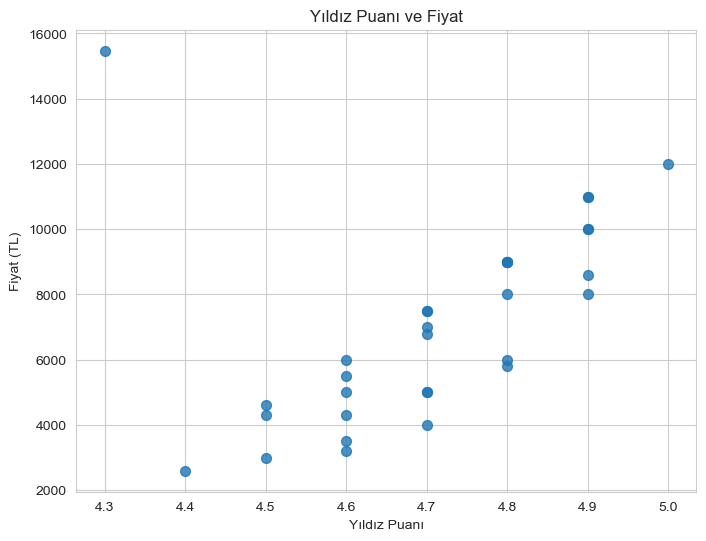

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['yıldız'], df['fiyat'], s=50, alpha=0.8)

ax.set_xlabel('Yıldız Puanı')
ax.set_ylabel('Fiyat (TL)')
plt.title('Yıldız Puanı ve Fiyat')

ax.grid(True)

plt.show()

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   urun_adı            32 non-null     object 
 1   marka_adı           32 non-null     object 
 2   model_adı           32 non-null     object 
 3   toplam_hacim        32 non-null     float64
 4   yukseklik           32 non-null     float64
 5   genislik            32 non-null     float64
 6   dondurucu_ozelligi  32 non-null     object 
 7   tip                 32 non-null     object 
 8   enerji_sınıfı       32 non-null     object 
 9   garanti_suresi      32 non-null     float64
 10  renk                32 non-null     object 
 11  derinlik            32 non-null     float64
 12  dondurucu_yeri      32 non-null     object 
 13  fiyat               32 non-null     float64
 14  yıldız              32 non-null     float64
 15  yorumlar            32 non-null     object 
 16  degerlendi

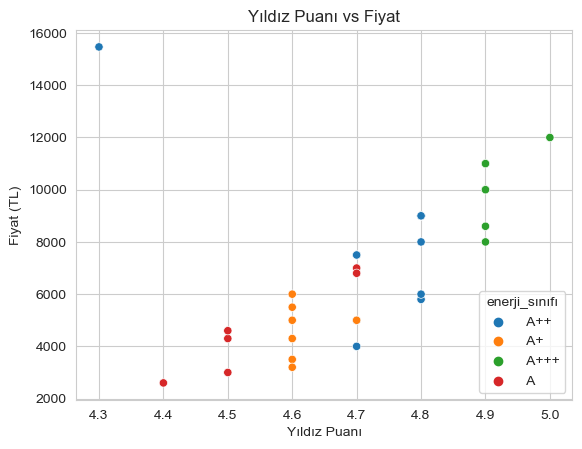

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.scatterplot(x='yıldız', y='fiyat', hue='enerji_sınıfı', data=df)
plt.xlabel('Yıldız Puanı')
plt.ylabel('Fiyat (TL)')
plt.title('Yıldız Puanı vs Fiyat')

plt.show()

In [156]:
get_recommendations('New Product 24')

6      New Product 7
20    New Product 21
25    New Product 26
30    New Product 31
0      New Product 1
13    New Product 14
21    New Product 22
24    New Product 25
28    New Product 29
29    New Product 30
Name: urun_adı, dtype: object